<a href="https://colab.research.google.com/github/lcjln/Kaggle_Project/blob/main/Titanic_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#기본 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [78]:
#로컬 파일 가져오기
from google.colab import files

uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


# 전체 데이터 핸들링

trian 데이터와 test 데이터를 합쳐서 전체 결측치를 파악한다

In [79]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [80]:
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop=True) # sort = True로 하면 열 이름을 a,b,c... 순으로 정렬함 -> Age, Cabin 순으로 열이 정렬됨
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [81]:
all_df.isnull().sum()
# 확인 결과 나이의 결측치가 많음을 알 수 있고 이를 보완할 방법을 찾아야한다. 나이 변수는 생존 여부와 상관 정도가 높은 변수이므로 해결해야한다

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [82]:
# Fare의 결측치를 평균값으로 결측치를 보완한다
Fare_mean = all_df[['Fare','Pclass']].groupby('Pclass').mean().reset_index()
Fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [83]:
Fare_mean.columns = ['Pclass','Fare_mean']
#Fare_mean.rename(columns={'Fare':'Fare_mean'}, inplace = True)
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [84]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [85]:
all_df = pd.merge(all_df, Fare_mean, on = 'Pclass', how = 'left')
all_df.loc[(all_df['Fare'].isnull()), 'Fare'] = all_df['Fare_mean'] # loc[행,열]에서 '열'에는 시리즈를 넣을 수 없다. 열 이름을 넣어야함 -> 'Fare' O / all_df['Fare'] X
all_df = all_df.drop('Fare_mean', axis = 1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


나이 결측치 보완하기

In [86]:
# 서양 사람들은 이름과 호칭을 붙인다. 주로 Mr는 나이가 좀 있는 남성에게, Mrs는 기혼여성, Miss는 미혼 여성, Master는 어린 남자아이들에게 붙인느 호칭으로 이를 이용하면 나이 결측치를 보완할 수 있을 것이다
name_df = all_df['Name'].str.split('[,.]', n = 2, expand=True)
name_df

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [87]:
name_df.columns = ['family_name','honorific','name']
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [88]:
name_df['family_name'] = name_df['family_name'].str.strip()
name_df['honorific'] = name_df['honorific'].str.strip()
name_df['name'] = name_df['name'].str.strip()
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [89]:
name_df['honorific'].value_counts()

,count
honorific,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mlle,2


In [90]:
all_df = pd.concat([all_df,name_df], axis = 1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

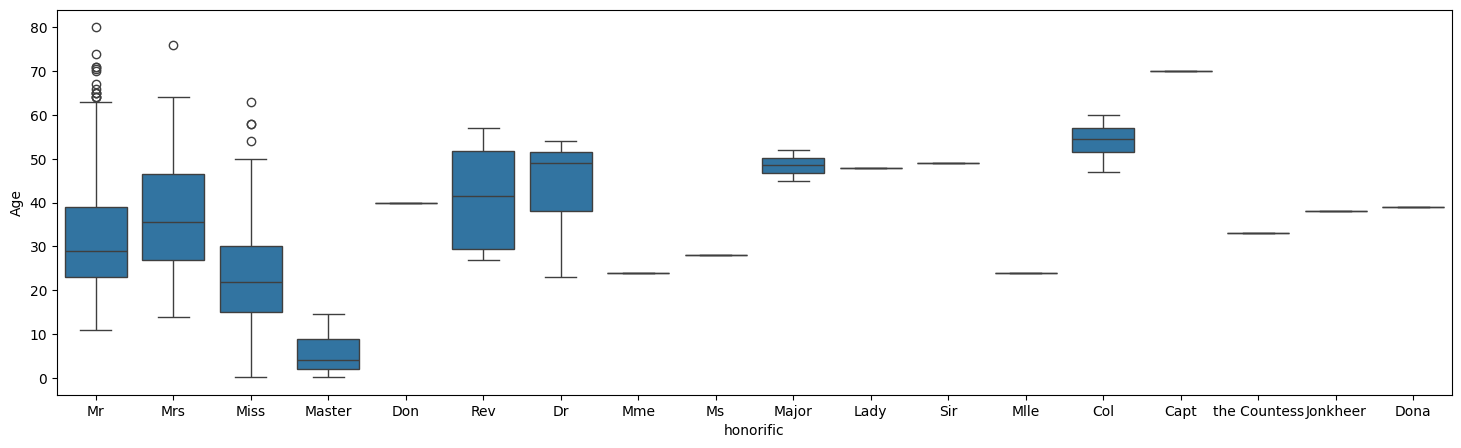

In [91]:
plt.figure(figsize=(18,5))
sns.boxplot(x = 'honorific', y = 'Age', data = all_df)

boxplot결과 호칭에 따라 연령도 분포가 다름을 알 수 있고 이들의 평균을 구해서 나이의 결측치를 대체할 수 있어 보인다

In [92]:
all_df[['honorific','Age']].groupby('honorific').mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [93]:
train_df = pd.concat([train_df, name_df.loc[:len(train_df)].reset_index(drop=True)], axis = 1)
test_df = pd.concat([test_df, name_df.loc[len(train_df):].reset_index(drop=True)], axis = 1)

<Axes: xlabel='honorific'>

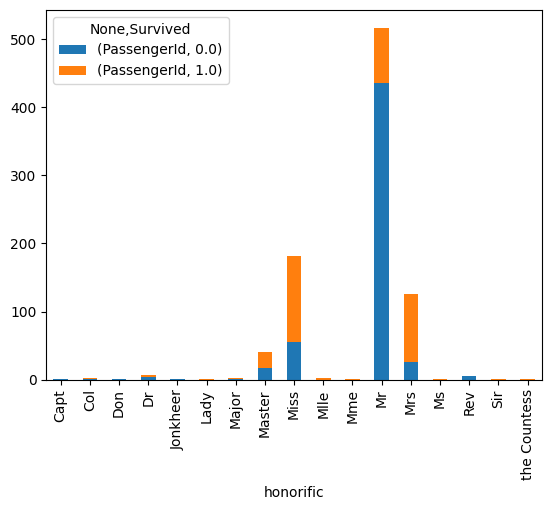

In [94]:
honorific_df = train_df[['honorific','Survived','PassengerId']].dropna().groupby(['honorific','Survived']).count().unstack()
honorific_df.plot.bar(stacked = True)

위 그래프를 통해 실제로 연령대 별 생존 그래프, 성별과 생존 상관관계와 유사하게 나옴을 알 수 있다.

이제 honorific의 평균 나이를 구하여 Age의 결측치를 대체하면 된다

In [95]:
honorific_mean_age = all_df[['honorific','Age']].groupby('honorific').mean().reset_index()
honorific_mean_age.rename(columns = {'Age':'honorific_mean_age'}, inplace = True)
all_df = pd.merge(all_df, honorific_mean_age, on = 'honorific', how = 'left')
all_df.loc[all_df['Age'].isnull(), 'Age'] = all_df['honorific_mean_age']
all_df = all_df.drop('honorific_mean_age', axis = 1)



---
가족과 함께온 케이스와 그렇지 않은 경우를 계산하여 추가한다


In [97]:
#'Parch'와 'SibSp'의 합을 구하여 가족 수('family_num')을 구하여 혼자 온 사람은 칼럼 명'alone'으로 하여 1, 아닌 사람은 0으로 기입
all_df['family_num'] = all_df['Parch'] + all_df['SibSp']
all_df.loc[all_df['family_num'] == 0, 'alone'] = 1
all_df.loc[all_df['family_num'] != 0, 'alone'] = 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,0,1.0


In [98]:
all_df['family_num'].value_counts()

,count
family_num,
0,790
1,235
2,159
3,43
5,25
4,22
6,16
10,11
7,8


In [99]:
all_df.fillna(0, inplace = True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,0,S,Spector,Mr,Woolf,0,1.0
1305,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0,1.0
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,0.0,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,0,S,Ware,Mr,Frederick,0,1.0


In [100]:
#불필요한 데이터 삭제
all_df = all_df.drop(['PassengerId','Name','family_name','name','Ticket','Cabin'], axis = 1)
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.000000,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.000000,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.000000,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.000000,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.000000,0,0,8.0500,S,Mr,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0
1305,0.0,1,female,39.000000,0,0,108.9000,C,Dona,0,1.0
1306,0.0,3,male,38.500000,0,0,7.2500,S,Mr,0,1.0
1307,0.0,3,male,32.252151,0,0,8.0500,S,Mr,0,1.0


In [103]:
#'honorific'에서 'Mr','Miss','Mrs','Master'를 제외한 호칭을 'others'로 통합
all_df.loc[(all_df['honorific'] != 'Mr') & (all_df['honorific'] != 'Miss') & (all_df['honorific'] != 'Mrs') & (all_df['honorific'] != 'Master'), 'honorific'] = 'others'
all_df['honorific'].value_counts()

,count
honorific,
Mr,757
Miss,260
Mrs,197
Master,61
others,34
